## MNIST 예제 - Keras를 이용한 딥러닝 

### 학습내용
 * Keras를 이용하여 간단한 딥러닝 모델을 만들어 본다.
 * MNIST는 손글씨 데이터이다. 훈련용 데이터 60000장, 테스트 데이터 10000장으로 구성

## 사전준비
 * pip install tensorflow  를 하여 설치(python 3.7일 경우, 설치 안될 경우 발생할 수 있음.)
 * pip install keras 를 하여 설치
 * 기타 Google Colab이용 

## Keras 
* https://keras.io/ 
* Keras는 파이썬의 딥러닝 라이브러리이다.
* 쉽고 빠르게 동작하는 것을 만들어보고 싶을 때 사용해 본다.

In [24]:
from keras.datasets import mnist
from keras.utils import np_utils

In [25]:
import numpy
import sys
import tensorflow as tf

In [26]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [27]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


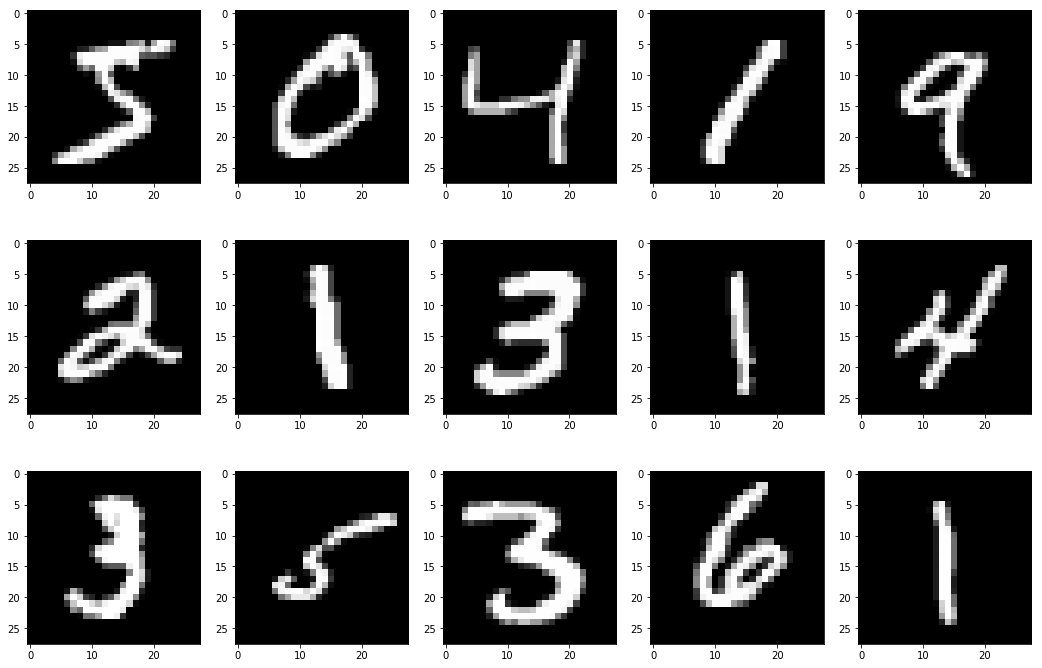

In [29]:
figure,axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(Y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].imshow(X_train[col])
    axes[row][1].imshow(X_train[col+1])
    axes[row][2].imshow(X_train[col+2])
    axes[row][3].imshow(X_train[col+3])
    axes[row][4].imshow(X_train[col+4])

In [30]:
print(X_train.shape[0])  
print(Y_train[0], X_train[0])

60000
5 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 25

In [31]:
X_train = X_train.reshape(X_train.shape[0],784) # 60000, 28, 28 => 60000, 784
X_train.astype('float64')
X_train = X_train/255   # 0~1사이의 값으로

In [32]:
X_train.shape

(60000, 784)

In [33]:
X_test = X_test.reshape(X_test.shape[0],784)  # 60000, 28, 28 => 60000, 784
X_test.astype('float64')
X_test = X_test/255      # 0~1사이의 값으로

In [34]:
print(Y_train[0:4])

[5 0 4 1]


In [35]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [36]:
print(Y_train[0:4])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 딥러닝 프레임 만들기 - 인공신경망

In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
m = Sequential()

In [39]:
m.add(Dense(512,input_dim=784, activation='relu'))
m.add(Dense(10,activation='softmax'))    # softmax

### 오차함수 :categorical_crossentropy, 최적화 함수 : adam

In [40]:
m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

## 세부 설정 및 모델 학습 저장

* model 폴더가 존재하지 않는다면 폴더 생성
* 모델 기록 파일

In [41]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
MODEL_DIR = './model/' 

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=1, save_best_only=True) 

#10회 이상 성능향상이 없다면 중단하라
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### 알아두기
 * verbose = 0,1,2 : 아무것도 안함(0) progress bar를 보여준다(1), epoch 수를 보여준다(2)
 * validation_data : 평가용 데이터 이용
 * 배치 사이즈 : 200
 

In [42]:
###샘플 200, 모두 30번 실행,
hist = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=30,
                batch_size=200,
                verbose=2,  
                callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.2979 - accuracy: 0.9171 - val_loss: 0.1547 - val_accuracy: 0.9541

Epoch 00001: val_loss improved from inf to 0.15474, saving model to ./model/01-0.1547.hdf5
Epoch 2/30
 - 5s - loss: 0.1246 - accuracy: 0.9639 - val_loss: 0.1055 - val_accuracy: 0.9691

Epoch 00002: val_loss improved from 0.15474 to 0.10545, saving model to ./model/02-0.1055.hdf5
Epoch 3/30
 - 5s - loss: 0.0819 - accuracy: 0.9761 - val_loss: 0.0841 - val_accuracy: 0.9759

Epoch 00003: val_loss improved from 0.10545 to 0.08408, saving model to ./model/03-0.0841.hdf5
Epoch 4/30
 - 5s - loss: 0.0605 - accuracy: 0.9827 - val_loss: 0.0792 - val_accuracy: 0.9748

Epoch 00004: val_loss improved from 0.08408 to 0.07925, saving model to ./model/04-0.0792.hdf5
Epoch 5/30
 - 5s - loss: 0.0455 - accuracy: 0.9870 - val_loss: 0.0675 - val_accuracy: 0.9797

Epoch 00005: val_loss improved from 0.07925 to 0.06746, saving model to ./model/05-0.0675.hdf5
Epoch 6/3

### 한 줄로 나의 모델 성능 평가가 가능하다.

In [43]:
print('\nAccuracy: {:.4f}'.format(m.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 69us/step

Accuracy: 0.9812


### 새로운 데이터에 대한 예측 수행이 가능하다.

In [44]:
pred = m.predict(X_test)   # 0.000으로 표시되는 것이 있을까?
pred[1]

array([4.6090833e-13, 5.3225222e-07, 9.9999952e-01, 6.3398813e-12,
       7.5467857e-22, 6.7245983e-16, 6.2522665e-12, 1.2638970e-21,
       3.8593187e-10, 4.2609935e-19], dtype=float32)

In [45]:
pred[1].argmax()

2

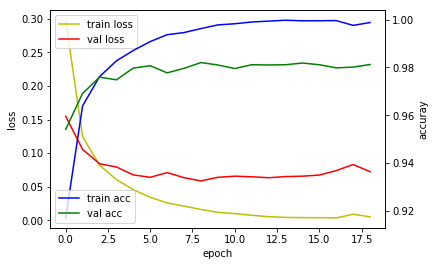

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

* train_loss(노란색) : 훈련 손실값이며 x축은 에포크 수, 좌측 y축은 손실값을 나타냅니다.
* val_loss(빨간색) : 검증 손실값이며 x축은 에포크 수, 좌측 y축은 손실값을 나타냅니다.
* train_acc(파란색) : 훈련 정확도이며 x축은 에포크 수, 우측 y축은 정확도를 나타냅니다.
* val_acc(녹색) : 검증 정확도이며 x축은 에포크 수, 우측 y축은 정확도를 나타냅니다

### REF
* 신경망 :  https://www.youtube.com/watch?v=Ilg3gGewQ5U